In [0]:
!pip3 install keras sklearn tqdm numpy keras_metrics tensorflow==1.14
%tensorflow_version 1.x

     |████████████████████████████████| 109.2MB 28kB/s 
     |████████████████████████████████| 3.2MB 56.7MB/s 
     |████████████████████████████████| 491kB 78.7MB/s 
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3
TensorFlow 1.x selected.


In [0]:
%tensorflow_version 1.x

In [0]:
!pip install sklearn

In [0]:
from keras.callbacks import History 
history = History()

Using TensorFlow backend.


In [0]:
#!pip install keras
from keras.models import Sequential

from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dropout, Dense
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.callbacks import EarlyStopping
from keras.models import Model
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Dropout, Activation,Bidirectional
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

In [0]:
from keras import backend
from keras.layers import Dense
from keras import Sequential
from keras.utils import  plot_model
import numpy as np
import tqdm
import time
import sklearn.metrics as metrics
from matplotlib.pyplot import *
from matplotlib import pyplot as plt
#import keras_metrics

In [0]:
!pip install keras-metrics


In [0]:
import keras_metrics

In [0]:
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from keras.models import model_from_json
from matplotlib.pyplot import *
from matplotlib import pyplot as plt

In [0]:
SEQUENCE_LENGTH = 100
EMBEDDING_SIZE = 300
TEST_SIZE = 0.5
FILTERS = 70
BATCH_SIZE = 100

EPOCHS =1  # number of epochs
# give lables a numeric value
label2int = {"ham": 0, "spam": 1}
int2label = {0: "ham", 1: "spam"}

In [0]:
max_features = 5000
maxlen = 100
batch_size = 100
embedding_dims = 50
filters = 250
kernel_size = 25
hidden_dims = 250
epochs = 300
pool_size = 15
lstm_output_size = 1028


In [0]:
def Load_data(): #loads the data in as UTF8-sig dk what sig is but stops it breaking 
  text, labels = [], []
  with open("datatest",encoding='utf-8-sig') as f:
    for line in f:
      split = line.split()
      labels.append(split[0].strip())
      text.append(''.join(split[1:]).strip())
  return text,labels 

In [0]:
X, y = Load_data() # loads the x and Y data 


In [0]:
tokenizer = Tokenizer() #converts the utf-8 into tokinized characters 
tokenizer.fit_on_texts(X)
# tokinize into ints 
X = tokenizer.texts_to_sequences(X)


In [0]:
X = np.array(X)
y = np.array(y)
X = pad_sequences(X, maxlen=SEQUENCE_LENGTH)

In [0]:
y = [ label2int[label] for label in y ] #loads lables 
y = to_categorical(y)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=43) #plit data


Loads glve embedding file

In [0]:
def get_embedding_vectors(tokenizer, dim=EMBEDDING_SIZE):
    embedding_index = {}
    with open("glove.6B.300d.txt", 'r',encoding='utf8',errors = 'ignore') as f:
        for line in tqdm.tqdm(f, "Reading GloVe"):
            values = line.split()
            word = values[0]
            vectors = np.asarray(values[1:], dtype='float32')
            embedding_index[word] = vectors

    word_index = tokenizer.word_index
    embedding_matrix = np.zeros((len(word_index)+1, dim))
    for word, i in word_index.items():
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            # words not found will be 0s
            embedding_matrix[i] = embedding_vector
            
    return embedding_matrix

LSTM MODEL IMPLEMENTATION

In [0]:

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Input, ConvLSTM2D, BatchNormalization, RepeatVector, Conv2D
from keras.models import Sequential, load_model
def get_model(tokenizer, lstm_units): # builds the lstm model
      
    embedding_matrix = get_embedding_vectors(tokenizer) # loads glove embedding 
    model = Sequential()
    model.add(Embedding(len(tokenizer.word_index)+1, 
              EMBEDDING_SIZE,
              weights=[embedding_matrix],
              trainable=False,
              input_length=SEQUENCE_LENGTH))
   
    model.add(LSTM(lstm_units, recurrent_dropout=0.3))
    model.add(Dropout(0.5))

    model.add(Dense(2, activation="softmax")) #probobility studff 
    

    # rmsprop better than adam 
    #weights[0] = weights[0].reshape(list(reversed(weights[0].shape)))
    model.compile(optimizer="adam", loss="categorical_crossentropy",
                  metrics=["accuracy", keras_metrics.precision(), keras_metrics.recall()])
    
    model.summary()
    return model

Reading GloVe: 16569it [00:01, 12049.91it/s]


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
tracking <tf.Variable 'Variable:0' shape=() dtype=int32> tp
tracking <tf.Variable 'Variable_1:0' shape=() dtype=int32> fp
tracking <tf.Variable 'Variable_2:0' shape=() dtype=int32> tp
tracking <tf.Variable 'Variable_3:0' shape=() dtype=int32> fn
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          5302500   
_________________________________________________________________
lstm_1 (LSTM)                (None, 2048)              19243008  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
Total params: 24,549,606
Trainable params: 19,247,106
Non

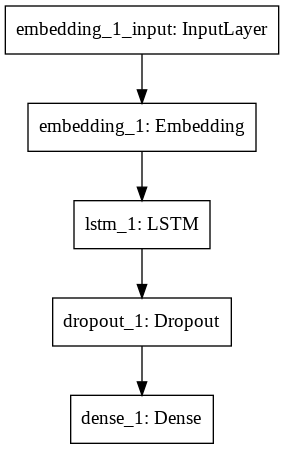

In [0]:
model = get_model(tokenizer=tokenizer, lstm_units=2048)  # adds LSTM unnits to the model 
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
# initialize our ModelCheckpoint and TensorBoard callbacks
# model checkpoint for saving best weights poor attempt at better learnrin model 
model_checkpoint = ModelCheckpoint("phish{val_loss:.2f}", save_best_only=True,
                                    verbose=1)
# for better visualization
tensorboard = TensorBoard(f"phish{time.time()}")
# print our data shapes
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
          batch_size=BATCH_SIZE, epochs=EPOCHS,
          callbacks=[tensorboard, model_checkpoint],
          verbose=1)
model.fit



X_train.shape: (11911, 100)
X_test.shape: (11912, 100)
y_train.shape: (11911, 2)
y_test.shape: (11912, 2)

Train on 11911 samples, validate on 11912 samples


Epoch 1/100
11911/11911 [==============================] - 54s 5ms/step - loss: 0.6376 - accuracy: 0.7094 - precision: 0.7009 - recall: 0.9345 - val_loss: 0.5850 - val_accuracy: 0.7015 - val_precision: 0.6956 - val_recall: 0.9753


Epoch 00001: val_loss improved from inf to 0.58503, saving model to phish0.59
Epoch 2/100
11911/11911 [==============================] - 52s 4ms/step - loss: 0.5447 - accuracy: 0.7330 - precision: 0.7244 - recall: 0.9766 - val_loss: 0.5686 - val_accuracy: 0.7084 - val_precision: 0.6993 - val_recall: 0.9853

Epoch 00002: val_loss improved from 0.58503 to 0.56856, saving model to phish0.57
Epoch 3/100
11911/11911 [==============================] - 52s 4ms/step - loss: 0.5405 - accuracy: 0.7300 - precision: 0.7265 - recall: 0.9718 - val_loss: 0.5509 - val_accuracy: 0.7189 - val_precision: 0.7074 - val_rec

In [0]:
history_dict = history.history
print(history_dict.keys())
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [0]:
# get the loss and metrics
result = model.evaluate(X_test, y_test)
# extract those
loss = result[0]
accuracy = result[1]
precision = result[2]
recall = result[3]
print(f"[+] Accuracy: {accuracy*100:.2f}%") # overall accuracy of model 
print(f"[+] Precision:   {precision*100:.2f}%") # What proportion of positive identifications was actually correct? #https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall
print(f"[+] Recall:   {recall*100:.2f}%") # What proportion of actual positives was identified correctly?

In [0]:
def rnn_lstm_predict(text): #tokinizes text -> based on that to predict function then depending labels to output thus prediction 
    sequence = tokenizer.texts_to_sequences([text])
    # pad the sequence
    sequence = pad_sequences(sequence, maxlen=SEQUENCE_LENGTH)
    # get the prediction
    prediction = model.predict(sequence)   
    prob =  model.predict_proba(sequence)[:,1]
  
    print(prob)
    return int2label[np.argmax(prediction)]

In [0]:

print("=====================")
print ("Phish Email Test")
print("Sextaution Email")
spam_text = "I’m aware is your password. You may not know me, and you are most likely wondering why you’re getting this mail, right Overview: I installed a malware on the adult vids (sex sites) site, and there’s more, you visited this site to have fun (you know what I mean). Once you were there on the website, my malware took control of your browser. It started operating as a keylogger and remote desktop protocol which gave me access to your webcam. Immediately after that my software collected your complete contacts (you have a good taste lol…)"
print(seq_predict(spam_text))
print("=====================")
print ("                    ")

print("=====================")
print ("Phish Email Test")
print("Paypal Phishing Email")
spam_text1 = "We’ve noticed some unusual activity on your PayPal account and we’re concerned about the potential unauthorised access, your PayPal account: myemail@gmail.com has be accessed form a new browser or device."
print(seq_predict(spam_text1))
print("=====================")
print ("                    ")

print("=====================")
print ("Phishing  Email Test")
print("Russian Bride sex scam")
spam_text2 = "Seems to me that you are the person I am looking for. Tell me about you. Send me your picture as well.I am Lyudmila, I am 38 years old. I wonder how old you are? I am just looking to find a man who might be older when compared to me.I'am living and also came into this world in Russia. What area you live in? I need to get to know a guy with whom i find common pursuits."
print(rnn_lstm_predict(spam_text2))
print("=====================")
print ("                    ")


print("=====================")
print ("phish")
print("card email")
spam_text3 = "Are you around? I need to pay a vendor with the blucard."
print(rnn_lstm_predict(spam_text3))
print("=====================")
print ("                    ")


print("=====================")
print ("phish")
print("login email  email")
spam_text4 = "Dear Customer,Someone else was trying to use your Berkeley ID to sign into iCloud via a web browser.Date and Time: 28 October 2016,1:38 PMBrowser: FirefoxOperating System: WindowsLocation:ThailandIf the information above looks familiar, youcandisregard this email.If you have not recently and believe someone may be trying to access your account, you should Click Here <http://goo.gl/rk87KW>.."
print(rnn_lstm_predict(spam_text4))
print("=====================")
print ("                    ")



print("=====================")
print ("phish")
print("update  email")
spam_text5 = "Password will expire in 2 days  Click Here To Validate E-mailThank you,IT-Service Help Desk"
print(rnn_lstm_predict(spam_text5))
print("=====================")
print ("                    ")


print("=====================")
print ("phish")
print("Itunes")
spam_text6 = "Your Itunes-ID has been disabled.You've place your account under the risk of termination by not keeping the correct informations/Please verify your account as soon as possible.Ready to check ?Click here to get back youraccount" 
print(rnn_lstm_predict(spam_text6))
print("=====================")
print ("                    ")


print("=====================")
print ("Legit Email Test")
print("MADG OFFER")
legit_text = "Good Afternoon Harry,Further to our conversation I’m pleased to confirm that we would like to make you an offer to join Marshall Aerospace and Defence Group"
print(rnn_lstm_predict(legit_text))
print("=====================")
print ("                    ")

print("=====================")
print ("Legit Email Test")
print("HSBC Email ")
legit_text1 = "We are making changes to the way we charge you for using your overdraft to comply with new rules that apply to all banks. We explain the changes we’re making in more detail later in this email. It’s important you read these carefully, so you understand what they mean for you"
print(rnn_lstm_predict(legit_text1))
print("=====================")
print ("                    ")

print("=====================")
print ("Legit Email Test")
print("Exirian  Email ")
legit_text2 = "The health and safety of you and your loved ones is enough to worry about at the moment without adding an increased risk of falling foul to fraud into the mix. Coronavirus-related fraud reports increased by 400% in March, so we wanted to arm you with the tips and advice you need to make sure you’re prepared to spot these underhand scams."
print(rnn_lstm_predict(legit_text2))
print("=====================")
print ("                    ")


bi lstm 


In [0]:
def bi_boi(tokenizer,lstm_units): #loads the function and creates a BI_rnn network 
  embedding_matrix = get_embedding_vectors(tokenizer)
  model = Sequential()
  model.add(Embedding(len(tokenizer.word_index)+1,
                      EMBEDDING_SIZE,
                      weights=[embedding_matrix],
                      trainable=False,
                      input_length =SEQUENCE_LENGTH))
  model.add(Bidirectional(LSTM(64))) #creates given network
  model.add(Dropout(0.5))
  model.add(Dense(2, activation='sigmoid'))
  plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
  model.compile(optimizer="rmsprop", loss="categorical_crossentropy",
                  metrics=["accuracy", keras_metrics.precision(), keras_metrics.recall()])
  model.summary()
  return model

In [0]:
model_bi_boi = bi_boi(tokenizer,lstm_units=1024)  
from keras.utils import plot_model
plot_model(model_bi_boi, to_file='model_Bi_lstm.png')

In [0]:
# initialize our ModelCheckpoint and TensorBoard callbacks
# model checkpoint for saving best weights
import matplotlib.pyplot as plt
from keras.callbacks import History 
plot_model(model_bi_boi, to_file='model12.png')

model_checkpoint = ModelCheckpoint("phish{val_loss:.2f}", save_best_only=True,verbose=1)
# for better visualization
history = History()
tensorboard = TensorBoard(f"phish{time.time()}")
# print our data shapes
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)
# traiaining in progress 
model_bi_boi.fit(X_train, y_train, validation_data=(X_test, y_test),
          batch_size=BATCH_SIZE, epochs=EPOCHS,
          callbacks=[tensorboard, model_checkpoint,history],
          verbose=1)

init_g = tf.global_variables_initializer()
init_l = tf.local_variables_initializer()
with tf.Session() as sess:
    sess.run(init_g)
    sess.run(init_l)


In [0]:
history_dict = history.history
print(history_dict.keys())
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

SAVE THE MODEL 

In [0]:
model_bi_boi.save('bi_lstm.h5') #saves the model 

In [0]:
# get the loss and metrics
result = model_bi_boi.evaluate(X_test, y_test)

# extract those
loss = result[0]
accuracy = result[1]
precision = result[2]
recall = result[3]

print(f"[+] Accuracy: {accuracy*100:.2f}%") # overall accuracy of model 
print(f"[+] Precision:   {precision*100:.2f}%") # What proportion of positive identifications was actually correct? #https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall
print(f"[+] Recall:   {recall*100:.2f}%") # What proportion of actual positives was identified correctly?

In [0]:

def bi_lstm_predict(text):
    sequence = tokenizer.texts_to_sequences([text])
    # pad the sequence
    sequence = pad_sequences(sequence, maxlen=SEQUENCE_LENGTH)
    # get the prediction
    prediction = model_bi_boi.predict(sequence)[0]
    prob =  model.predict_proba(sequence)[:,1]
    print (prob)
    return int2label[np.argmax(prediction)]

In [0]:

print("=====================")
print ("Phish Email Test")
print("Sextaution Email")
spam_text = "I’m aware is your password. You may not know me, and you are most likely wondering why you’re getting this mail, right Overview: I installed a malware on the adult vids (sex sites) site, and there’s more, you visited this site to have fun (you know what I mean). Once you were there on the website, my malware took control of your browser. It started operating as a keylogger and remote desktop protocol which gave me access to your webcam. Immediately after that my software collected your complete contacts (you have a good taste lol…)"
print(bi_lstm_predict(spam_text))
print("=====================")
print ("                    ")

print("=====================")
print ("Phish Email Test")
print("Paypal Phishing Email")
spam_text1 = "We’ve noticed some unusual activity on your PayPal account and we’re concerned about the potential unauthorised access, your PayPal account: myemail@gmail.com has be accessed form a new browser or device."
print(bi_lstm_predict(spam_text1))
print("=====================")
print ("                    ")

print("=====================")
print ("Phishing  Email Test")
print("Russian Bride sex scam")
spam_text2 = "Seems to me that you are the person I am looking for. Tell me about you. Send me your picture as well.I am Lyudmila, I am 38 years old. I wonder how old you are? I am just looking to find a man who might be older when compared to me.I'am living and also came into this world in Russia. What area you live in? I need to get to know a guy with whom i find common pursuits."
print(bi_lstm_predict(spam_text2))
print("=====================")
print ("                    ")


print("=====================")
print ("phish")
print("card email")
spam_text3 = "Are you around? I need to pay a vendor with the blucard."
print(bi_lstm_predict(spam_text3))
print("=====================")
print ("                    ")



print("=====================")
print ("phish")
print("login email  email")
spam_text4 = "Dear User,Someone else was trying to use your Berkeley ID to sign into iCloud via a web browser.Date and Time: 28 October 2016,1:38 PMBrowser: FirefoxOperating System: WindowsLocation:ThailandIf the information above looks familiar, youcandisregard this email.If you have not recently and believe someone may be trying to access your account, you should Click Here <http://goo.gl/rk87KW>.."
print(bi_lstm_predict(spam_text4))
print("=====================")
print ("                    ")


print("=====================")
print ("phish")
print("update  email")
spam_text5 = "Password will expire in 2 days  Click Here To Validate E-mailThank you,IT-Service Help Desk"
print(bi_lstm_predict(spam_text5))
print("=====================")
print ("                    ")


print("=====================")
print ("phish")
print("login email  email")
spam_text6 = "Your Itunes-ID has been disabled.You've place your account under the risk of termination by not keeping the correct informations/Please verify your account as soon as possible.Ready to check ?Click here to get back youraccount" 
print(bi_lstm_predict(spam_text6))
print("=====================")
print ("                    ")

print("=====================")
print ("Legit Email Test")
print("MADG OFFER")
legit_text = "Good Afternoon Harry,Further to our conversation I’m pleased to confirm that we would like to make you an offer to join Marshall Aerospace and Defence Group"
print(bi_lstm_predict(legit_text))
print("=====================")
print ("                    ")

print("=====================")
print ("Legit Email Test")
print("HSBC Email ")
legit_text1 = "We are making changes to the way we charge you for using your overdraft to comply with new rules that apply to all banks. We explain the changes we’re making in more detail later in this email. It’s important you read these carefully, so you understand what they mean for you"
print(bi_lstm_predict(legit_text1))
print("=====================")
print ("                    ")

print("=====================")
print ("Legit Email Test")
print("Exirian  Email ")
legit_text2 = "The health and safety of you and your loved ones is enough to worry about at the moment without adding an increased risk of falling foul to fraud into the mix. Coronavirus-related fraud reports increased by 400% in March, so we wanted to arm you with the tips and advice you need to make sure you’re prepared to spot these underhand scams."
print(bi_lstm_predict(legit_text2))
print("=====================")
print ("                    ")


Sequencal Model 

In [0]:
def seq_boi(tokenizer): #loads the function and creates a BI_rnn network 
  embedding_matrix = get_embedding_vectors(tokenizer)
  model = Sequential()
  model.add(Embedding(len(tokenizer.word_index)+1,
                      EMBEDDING_SIZE,
                      weights=[embedding_matrix],
                      trainable=False,
                      input_length =SEQUENCE_LENGTH))

  from keras.layers import Dense, Activation, Flatten

  model.add(Dropout(0.3))
  model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
  model.add(MaxPooling1D(pool_size=pool_size))
  model.add(LSTM(lstm_output_size))
  model.add(Dense(2))
 
  #model.add(Flatten())
 
 
  
  model.add(Dense(2, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
  model.compile(optimizer="adam", loss="categorical_crossentropy",
                  metrics=["accuracy", keras_metrics.precision(), keras_metrics.recall()])
  model.summary()
  return model

In [0]:
from keras.layers import Conv1D, MaxPooling1D
model_seq_boi = seq_boi(tokenizer)  
from keras.utils import plot_model
plot_model(model_seq_boi, to_file='seq.png')

In [0]:
# initialize our ModelCheckpoint and TensorBoard callbacks
# model checkpoint for saving best weights
import matplotlib.pyplot as plt

plot_model(model_seq_boi, to_file='model12.png')


# for better visualization
history = History()

# print our data shapes
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)
# traiaining in progress 
history = model_seq_boi.fit(X_train, y_train, validation_data=(X_test, y_test),
          batch_size=BATCH_SIZE, epochs=EPOCHS,verbose=1)




In [0]:
# get the loss and metrics
result = model_seq_boi.evaluate(X_test, y_test)

# extract those
loss = result[0]
accuracy = result[1]
precision = result[2]
recall = result[3]

print(f"[+] Accuracy: {accuracy*100:.2f}%") # overall accuracy of model 
print(f"[+] Precision:   {precision*100:.2f}%") # What proportion of positive identifications was actually correct? #https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall
print(f"[+] Recall:   {recall*100:.2f}%") # What proportion of actual positives was identified correctly?

In [0]:
history_dict = history.history
print(history_dict.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
def seq_predict(text):
    sequence = tokenizer.texts_to_sequences([text])
    # pad the sequence
    sequence = pad_sequences(sequence, maxlen=SEQUENCE_LENGTH)
    # get the prediction
    prediction = model_seq_boi.predict(sequence)[0]

    return int2label[np.argmax(prediction)]

In [0]:

print("=====================")
print ("Phish Email Test")
print("Sextaution Email")
spam_text = "I’m aware is your password. You may not know me, and you are most likely wondering why you’re getting this mail, right Overview: I installed a malware on the adult vids (sex sites) site, and there’s more, you visited this site to have fun (you know what I mean). Once you were there on the website, my malware took control of your browser. It started operating as a keylogger and remote desktop protocol which gave me access to your webcam. Immediately after that my software collected your complete contacts (you have a good taste lol…)"
print(seq_predict(spam_text))
print("=====================")
print ("                    ")

print("=====================")
print ("Phish Email Test")
print("Paypal Phishing Email")
spam_text1 = "We’ve noticed some unusual activity on your PayPal account and we’re concerned about the potential unauthorised access, your PayPal account: myemail@gmail.com has be accessed form a new browser or device."
print(seq_predict(spam_text1))
print("=====================")
print ("                    ")

print("=====================")
print ("Phishing  Email Test")
print("Russian Bride sex scam")
spam_text2 = "Seems to me that you are the person I am looking for. Tell me about you. Send me your picture as well.I am Lyudmila, I am 38 years old. I wonder how old you are? I am just looking to find a man who might be older when compared to me.I'am living and also came into this world in Russia. What area you live in? I need to get to know a guy with whom i find common pursuits."
print(seq_predict(spam_text2))
print("=====================")
print ("                    ")


print("=====================")
print ("phish")
print("card email")
spam_text3 = "Are you around? I need to pay a vendor with the blucard."
print(seq_predict(spam_text3))
print("=====================")
print ("                    ")










print("=====================")
print ("phish")
print("login email  email")
spam_text4 = "Dear Customer,Someone else was trying to use your Berkeley ID to sign into iCloud via a web browser.Date and Time: 28 October 2016,1:38 PMBrowser: FirefoxOperating System: WindowsLocation:ThailandIf the information above looks familiar, youcandisregard this email.If you have not recently and believe someone may be trying to access your account, you should Click Here <http://goo.gl/rk87KW>.."
print(seq_predict(spam_text4))
print("=====================")
print ("                    ")



print("=====================")
print ("phish")
print("update  email")
spam_text5 = "Password will expire in 2 days  Click Here To Validate E-mailThank you,IT-Service Help Desk"
print(seq_predict(spam_text5))
print("=====================")
print ("                    ")







print("=====================")
print ("phish")
print("Itunes")
spam_text6 = "Your Itunes-ID has been disabled.You've place your account under the risk of termination by not keeping the correct informations/Please verify your account as soon as possible.Ready to check ?Click here to get back youraccount" 
print(seq_predict(spam_text6))
print("=====================")
print ("                    ")




print("=====================")
print ("Legit Email Test")
print("MADG OFFER")
legit_text = "Good Afternoon Harry,Further to our conversation I’m pleased to confirm that we would like to make you an offer to join Marshall Aerospace and Defence Group"
print(seq_predict(legit_text))
print("=====================")
print ("                    ")

print("=====================")
print ("Legit Email Test")
print("HSBC Email ")
legit_text1 = "We are making changes to the way we charge you for using your overdraft to comply with new rules that apply to all banks. We explain the changes we’re making in more detail later in this email. It’s important you read these carefully, so you understand what they mean for you"
print(seq_predict(legit_text1))
print("=====================")
print ("                    ")

print("=====================")
print ("Legit Email Test")
print("Exirian  Email ")
legit_text2 = "The health and safety of you and your loved ones is enough to worry about at the moment without adding an increased risk of falling foul to fraud into the mix. Coronavirus-related fraud reports increased by 400% in March, so we wanted to arm you with the tips and advice you need to make sure you’re prepared to spot these underhand scams."
print(seq_predict(legit_text2))
print("=====================")
print ("                    ")


1d cnn model

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.datasets import imdb


In [0]:

# set parameters:



In [0]:
# load embedding as a dict
def load_embedding(filename):
	# load embedding into memory, skip first line
	file = open(filename,'r',errors='Ignore')
	lines = file.readlines()
	file.close()
	# create a map of words to vectors
	embedding = dict()
	for line in lines:
		parts = line.split()
		# key is string word, value is numpy array for vector
		embedding[parts[0]] = asarray(parts[1:], dtype='float32')
	return embedding
  

In [0]:
# load embedding from file
raw_embedding = get_embedding_vectors(tokenizer)


Reading GloVe: 16569it [00:01, 14600.54it/s]


In [0]:
embedding_layer = Embedding(BATCH_SIZE,[embedding_dims])

In [0]:
def cnn_boi(tokenizer): #loads the function and creates a BI_rnn network 
  embedding_matrix = get_embedding_vectors(tokenizer)
  model = Sequential()
  model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
  model.add(Dropout(0.2))

  model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
  model.add(GlobalMaxPooling1D())

  model.add(Dense(hidden_dims))
  model.add(Dropout(0.2))
  model.add(Activation('relu'))

#thinns model to sigmoid large data ---> small Box (squashed) ^_^ 
  model.add(Dense(2))
  model.add(Activation('relu'))
  plot_model(model, to_file='1d_cnn.png', show_shapes=True, show_layer_names=True)
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


  return model

In [0]:
cnn_model = cnn_boi(tokenizer)

Reading GloVe: 17379it [00:01, 14664.57it/s]


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# initialize our ModelCheckpoint and TensorBoard callbacks
# model checkpoint for saving best weights
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import History 
plot_model(cnn_model, to_file='model12.png')

model_checkpoint = ModelCheckpoint("cnn_model{val_loss:.2f}", save_best_only=True,verbose=1)
# for better visualization
history = History()
tensorboard = TensorBoard(f"cnn_model{time.time()}")
# print our data shapes
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)
# traiaining in progress 
hisroty = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test),
          batch_size=BATCH_SIZE, epochs=EPOCHS,verbose=1)



X_train.shape: (3970, 100)
X_test.shape: (3971, 100)
y_train.shape: (3970, 2)
y_test.shape: (3971, 2)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 3970 samples, validate on 3971 samples
Epoch 1/1
3970/3970 [==============================] - 7s 2ms/step - loss: 0.8430 - accuracy: 0.5761 - val_loss: 0.6536 - val_accuracy: 0.6487


In [0]:
from matplotlib.pyplot import *
from matplotlib import pyplot as plt

In [0]:
history_dict = history.history
print(history_dict.keys())
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# get the loss and metrics
result = cnn_model.evaluate(X_test, y_test)

# extract those
loss = result[0]
accuracy = result[1]
#precision = result[2]
#recall = result[3]

print(f"[+] Accuracy: {accuracy*100:.2f}%") # overall accuracy of model 
print(f"[+] Precision:   {precision*100:.2f}%") # What proportion of positive identifications was actually correct? #https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall
print(f"[+] Recall:   {recall*100:.2f}%") # What proportion of actual positives was identified correctly?

In [0]:

def cnn_mod(text):
    sequence = tokenizer.texts_to_sequences([text])
    # pad the sequence
    sequence = pad_sequences(sequence, maxlen=SEQUENCE_LENGTH)
    # get the prediction
    prediction = cnn_model.predict(sequence)[0]
    prob =  cnn_model.predict_proba(sequence)[0]
    print (prob)
    return int2label[np.argmax(prediction)]

In [0]:

print("=====================")
print ("Phish Email Test")
print("Sextaution Email")
spam_text = "I’m aware is your password. You may not know me, and you are most likely wondering why you’re getting this mail, right Overview: I installed a malware on the adult vids (sex sites) site, and there’s more, you visited this site to have fun (you know what I mean). Once you were there on the website, my malware took control of your browser. It started operating as a keylogger and remote desktop protocol which gave me access to your webcam. Immediately after that my software collected your complete contacts (you have a good taste lol…)"
print(cnn_mod(spam_text))
print("=====================")
print ("                    ")

print("=====================")
print ("Phish Email Test")
print("Paypal Phishing Email")
spam_text1 = "We’ve noticed some unusual activity on your PayPal account and we’re concerned about the potential unauthorised access, your PayPal account: myemail@gmail.com has be accessed form a new browser or device."
print(cnn_mod(spam_text1))
print("=====================")
print ("                    ")

print("=====================")
print ("Phishing  Email Test")
print("Russian Bride sex scam")
spam_text2 = "Seems to me that you are the person I am looking for. Tell me about you. Send me your picture as well.I am Lyudmila, I am 38 years old. I wonder how old you are? I am just looking to find a man who might be older when compared to me.I'am living and also came into this world in Russia. What area you live in? I need to get to know a guy with whom i find common pursuits."
print(cnn_mod(spam_text2))
print("=====================")
print ("                    ")

print("=====================")
print ("Legit Email Test")
print("MADG OFFER")
legit_text = "Good Afternoon Harry,Further to our conversation I’m pleased to confirm that we would like to make you an offer to join Marshall Aerospace and Defence Group"
print(cnn_mod(legit_text))
print("=====================")
print ("                    ")

print("=====================")
print ("Legit Email Test")
print("HSBC Email ")
legit_text1 = "Hows it going"
print(cnn_mod(legit_text1))
print("=====================")
print ("                    ")

print("=====================")
print ("Legit Email Test")
print("Exirian  Email ")
legit_text2 = "hi hows it going"
print(cnn_mod(legit_text2))
print("=====================")
print ("                    ")












In [0]:
cnn_model.save('cnnmodel.h5')